# Pruebas para variables cuantitativas

## Instalar paquetes

In [1]:
# install.packages("e1071")

## Librerías utilizadas durante la clase

- [tydiverse](https://github.com/tidyverse/tidyverse): Es un conjunto de paquetes en R diseñados para ciencia de datos. Esto lo que significa es que ayuda en todo el proceso de importar transformar visualizar modelar y comunicar toda la información que normalmente utilizamos en procesos de ciencia de datos.
- [e1071](https://uribo.github.io/rpkg_showcase/data-analysis/e1071.html): Grupo de funciones varias.
- [readxl](https://github.com/tidyverse/readxl): Facilita la extracción de datos de Excel y los lleva a R, no tiene dependencias externas, por lo que es fácil de instalar y usar en todos los sistemas operativos.

## Cargar librerías

In [2]:
library("tidyverse")
library("e1071")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# install.packages("repr")
library("repr")
options(repr.plot.width = 14, repr.plot.height=12)

## Importar datos

In [4]:
read_delim(
  file = "project_multi_cuanti/data/winequality-red.csv",
  delim = ",", 
  locale=locale(decimal_mark = ".")
  ) -> wine_raw

## Revisar la estructura de los datos
str(wine_raw)

## Le decimos a R que vamos a trabajar con esos datos y se los ponemos "en primer plano"
attach(wine_raw)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



tibble [1,599 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ fixed acidity       : num [1:1599] 7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile acidity    : num [1:1599] 0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric acid         : num [1:1599] 0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual sugar      : num [1:1599] 1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num [1:1599] 0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free sulfur dioxide : num [1:1599] 11 25 15 17 11 13 15 15 9 17 ...
 $ total sulfur dioxide: num [1:1599] 34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num [1:1599] 0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num [1:1599] 3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num [1:1599] 0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num [1:1599] 9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : num [1

Para los datos de calidad del vino ya realizamos un análisis exploratorio que nos aportó evidencia para plantear algunas relaciones entre variables. Ahora vamos a comprobar esas relaciones y a cuantificarlas.

## Análisis gráfico

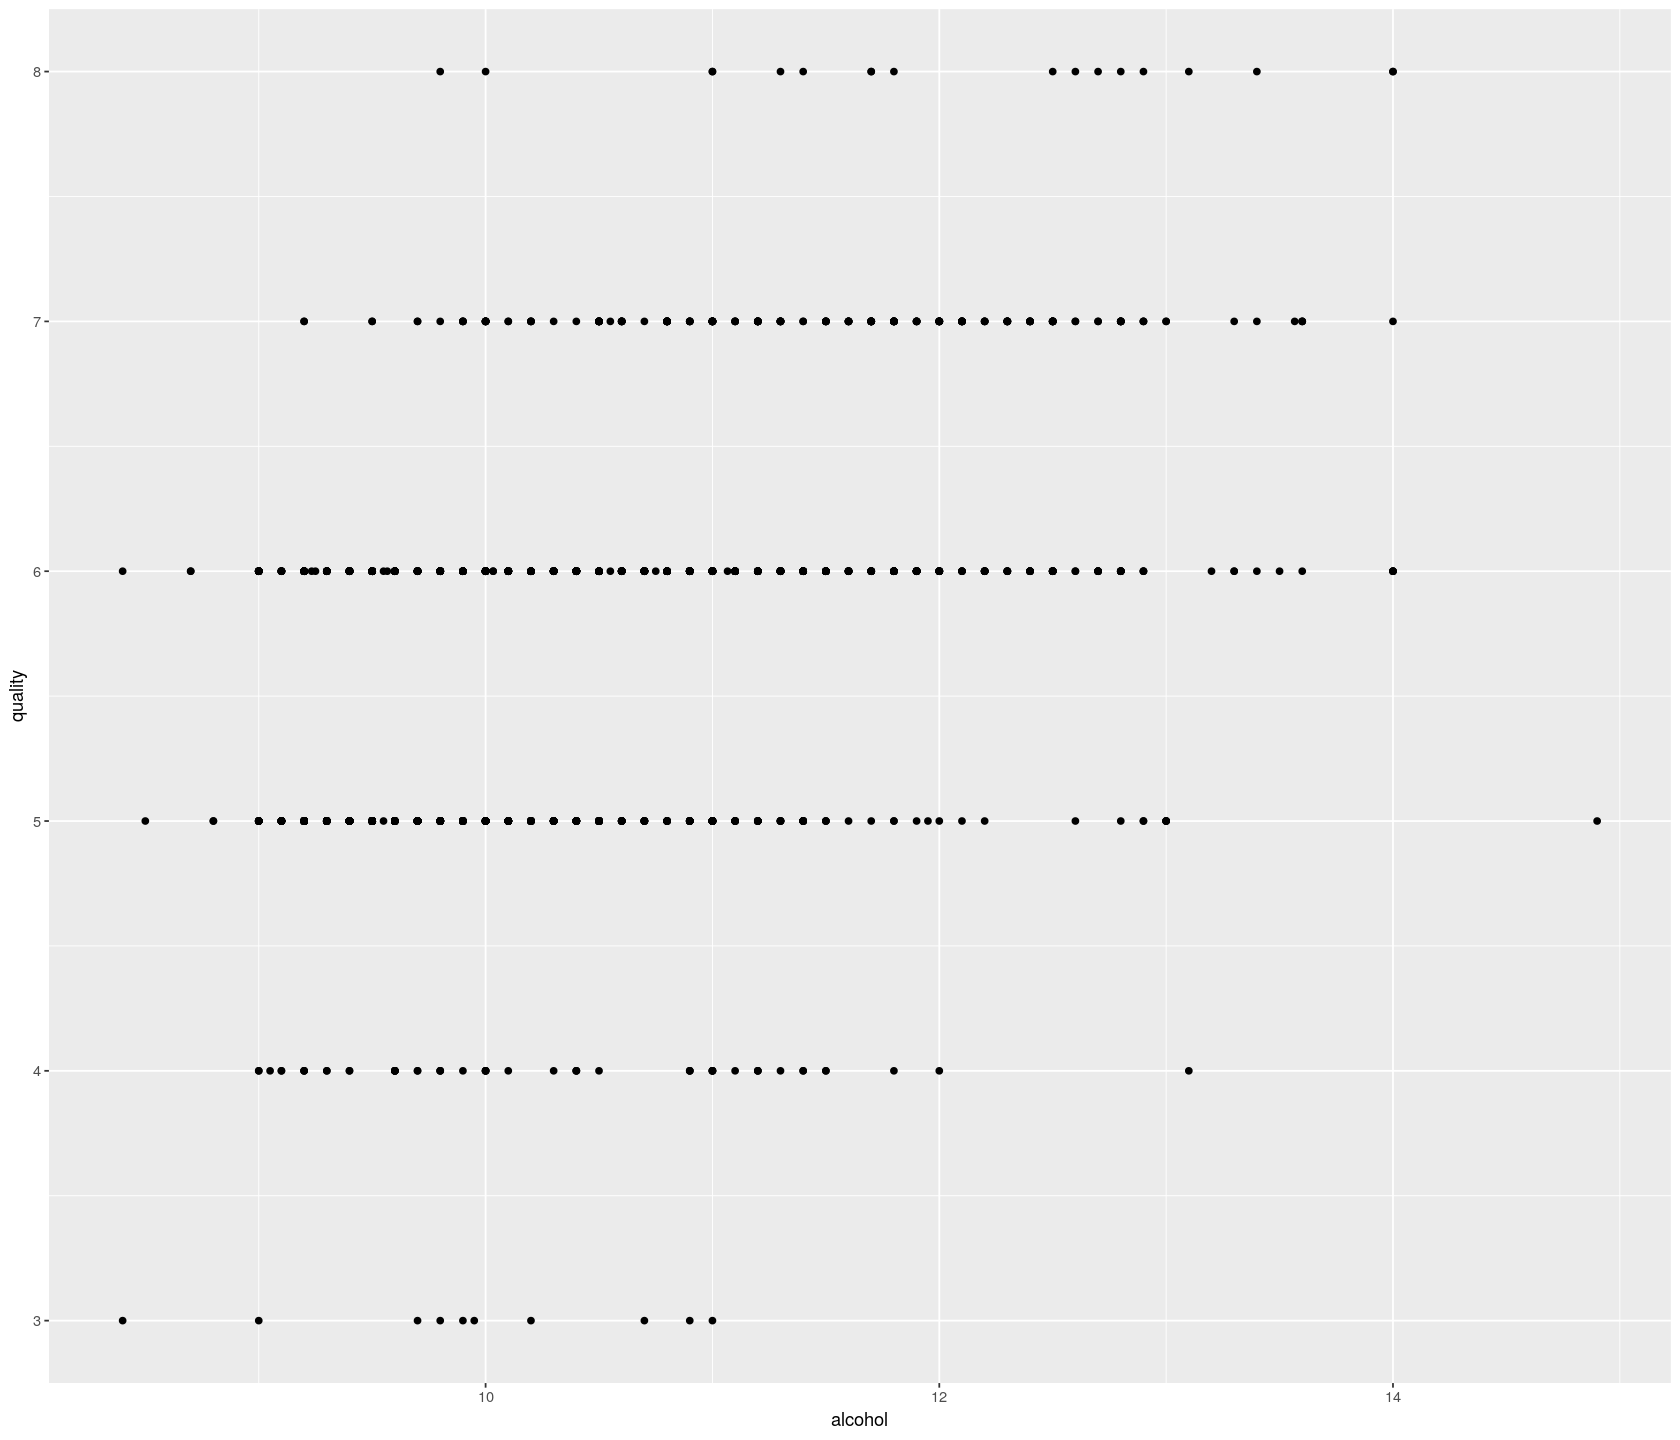

In [5]:
### Diagrama de dispersión
ggplot(wine_raw, aes(x=alcohol, y=quality)) + geom_point()

`geom_smooth()` using formula 'y ~ x'



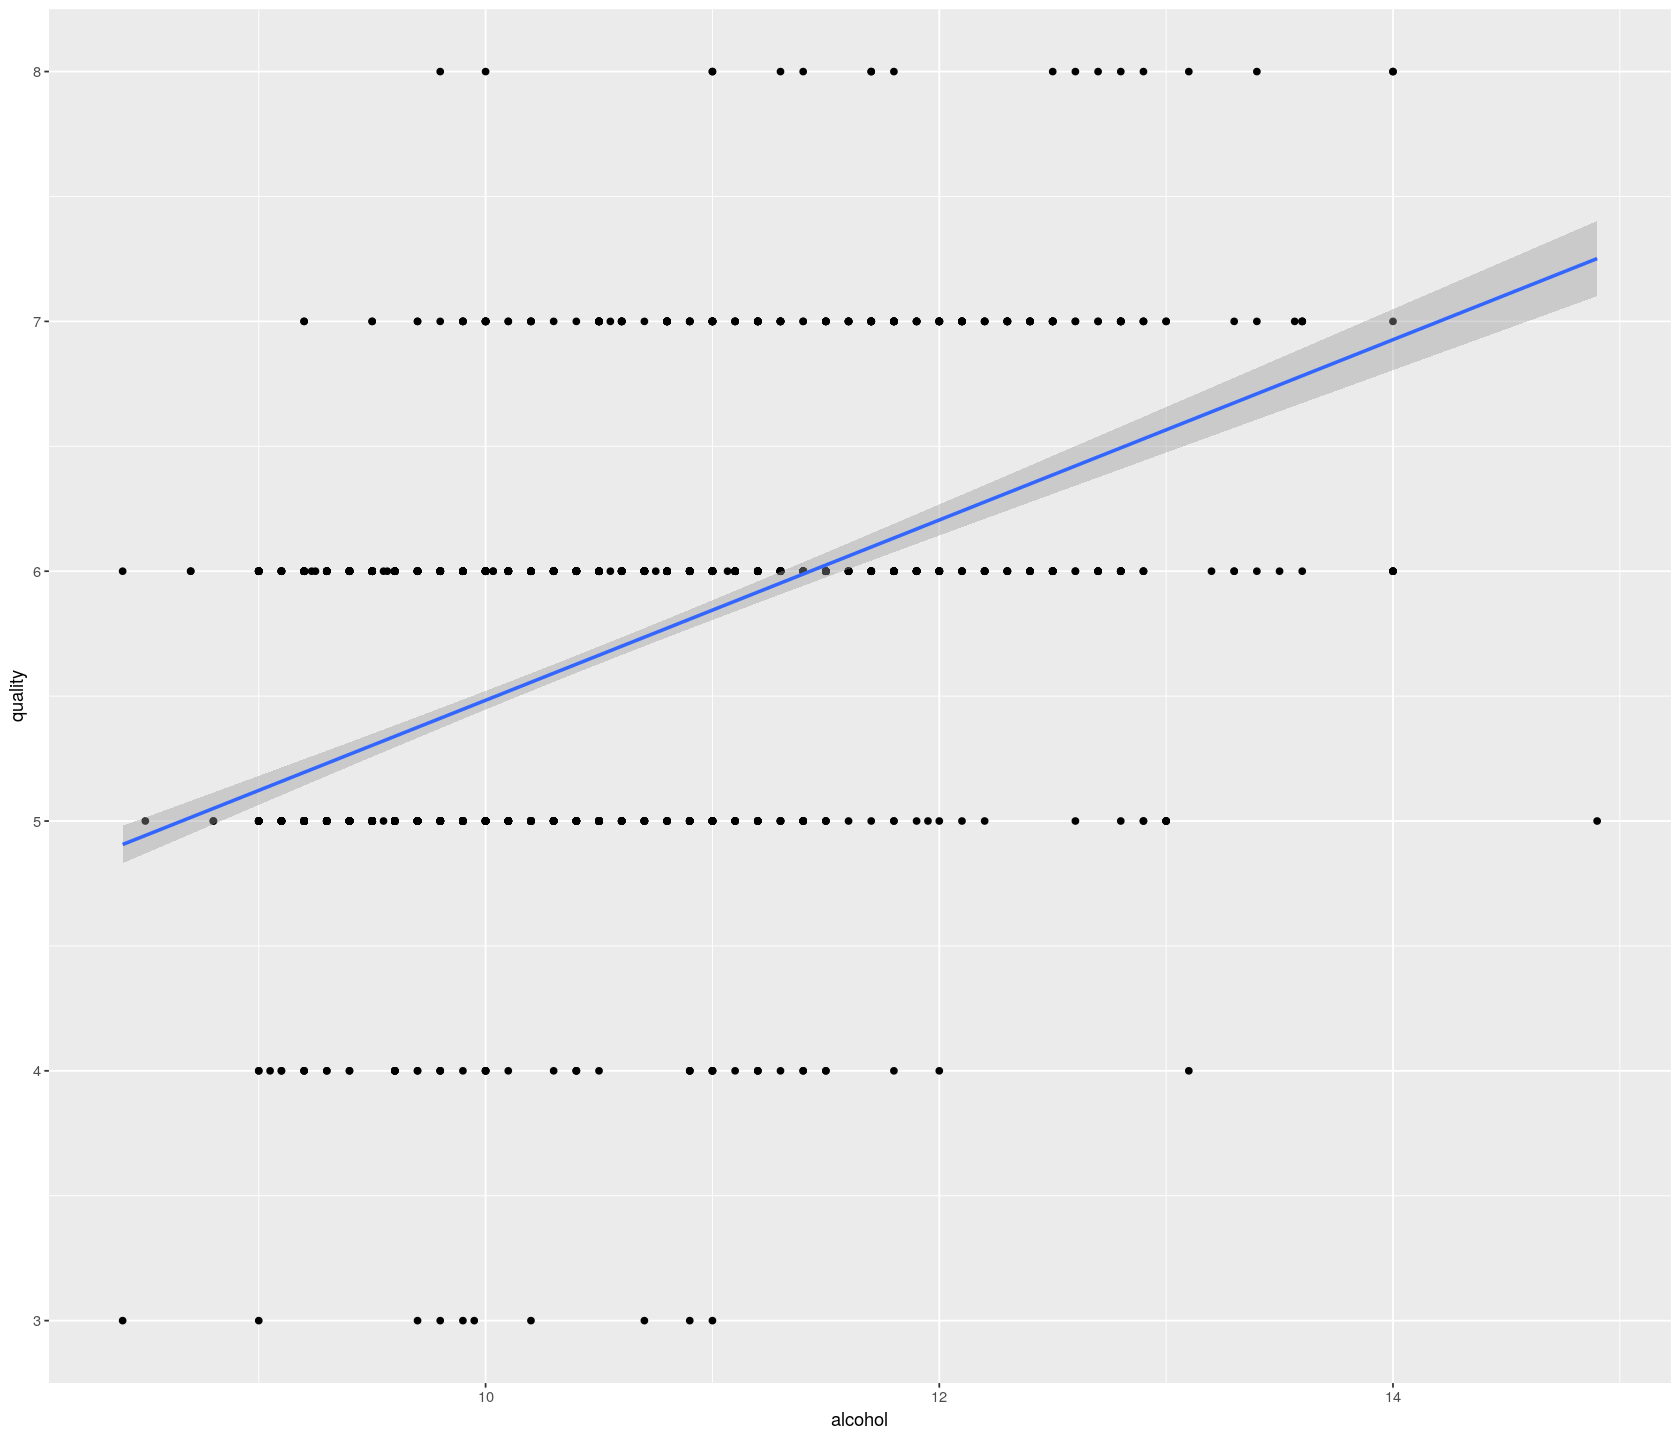

In [6]:
# Diagrama de dispersión con un intervalo de confianza para la pendiente
ggplot(wine_raw, aes(x=alcohol, y=quality)) + 
  geom_point() +
  geom_smooth(method=lm, se=TRUE)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



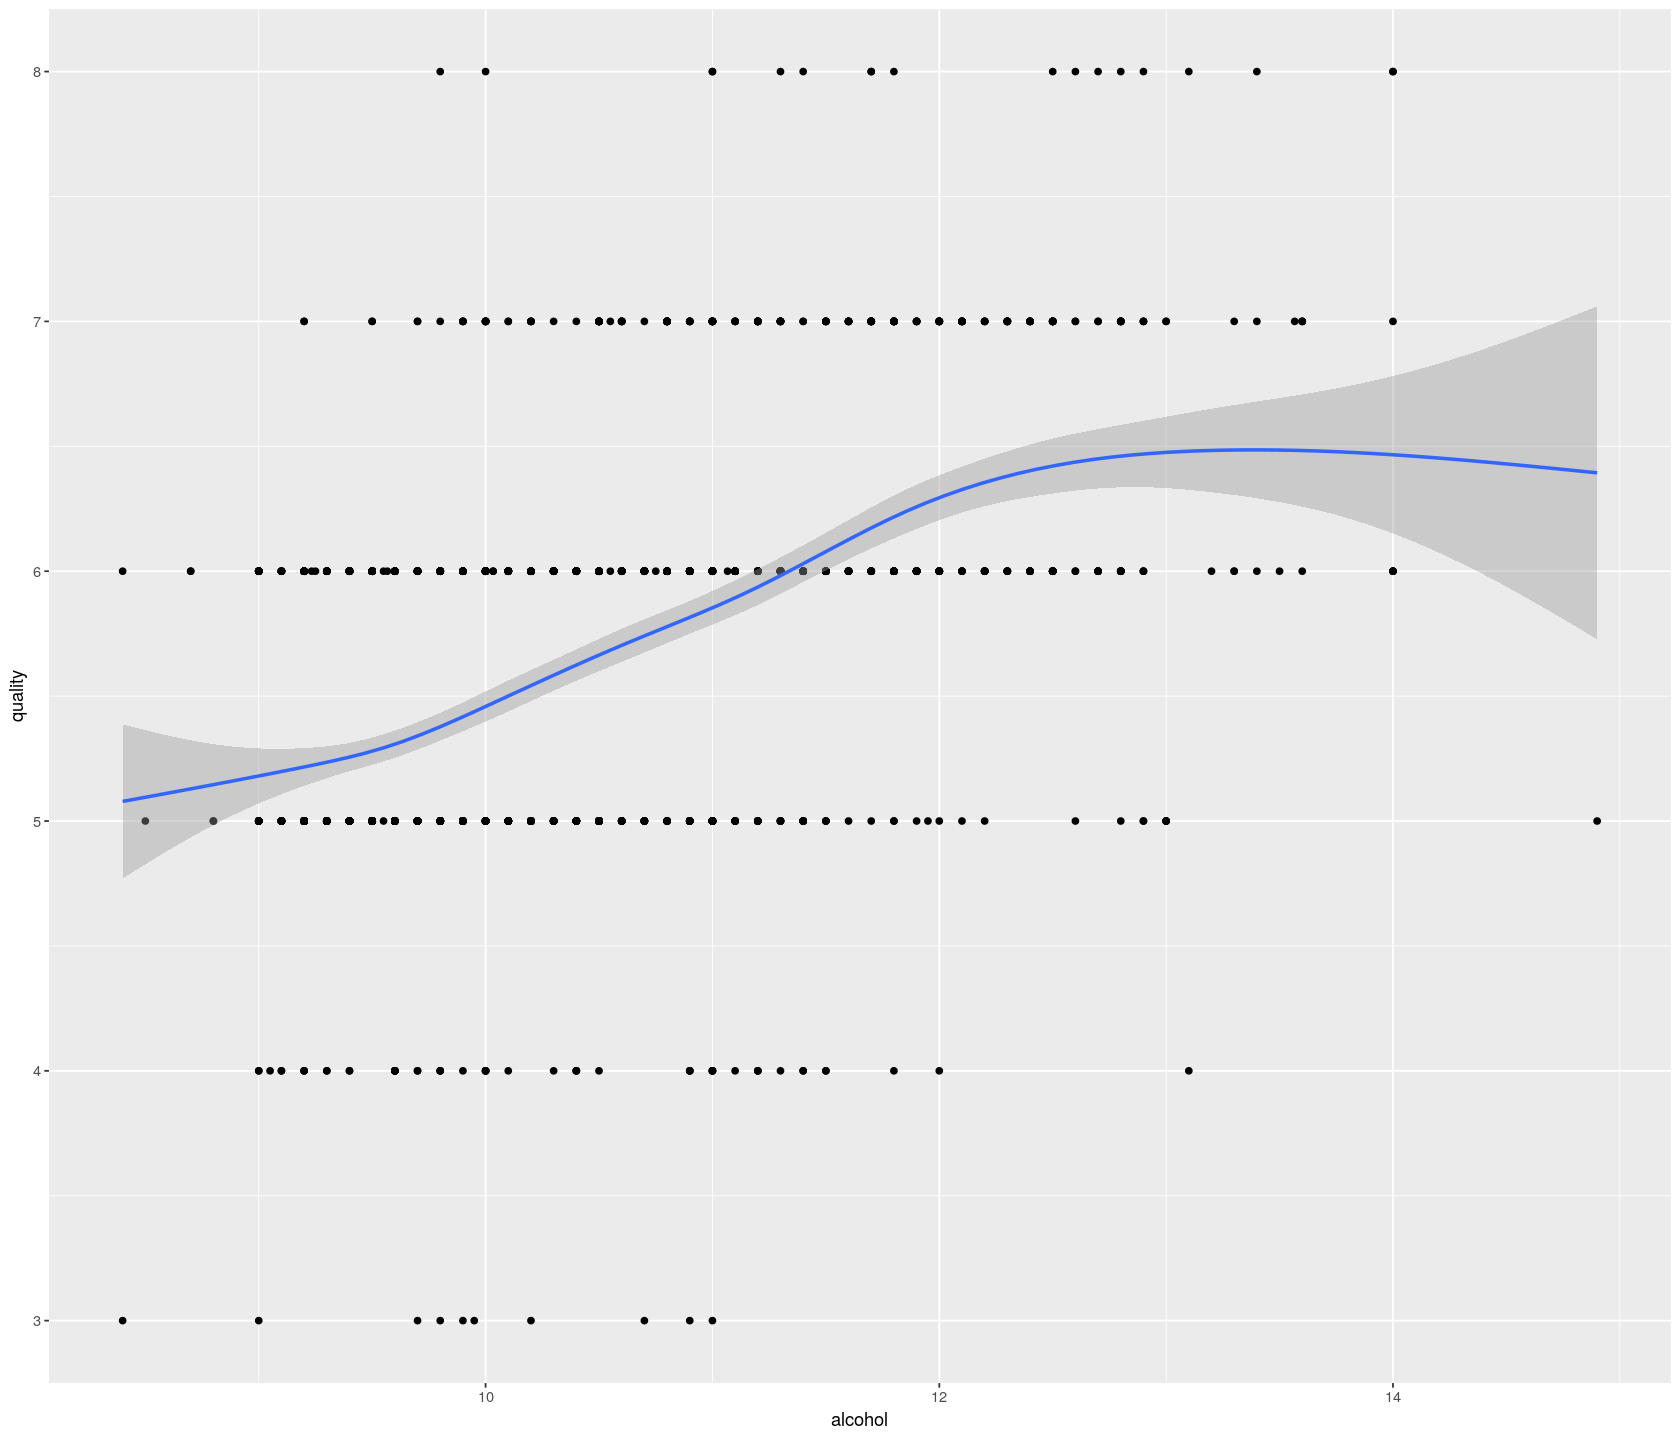

In [7]:
# Diagrama de dispersión con regresión local
ggplot(wine_raw, aes(x=alcohol, y=quality)) + 
  geom_point() +
  geom_smooth()

Si bien se ve que existe una correlación positiva entre las variables quality y alcohol y podemos trazar en el diagrama de dispersión una línea recta con pendiente positiva, así mismo vemos que el ajuste no es tan bueno.

Para tener un criterio más certero vamos a pasar del análisis gráfico al modelado y vamos a ajustar un modelo de regresión lineal.

## Ajuste del modelo de regresión lineal

In [8]:
# Sintaxis: lm(variable_respuesta ~ variable_explicativa + ..., data=data)
modelo.lineal <- lm(quality ~ alcohol, data=wine_raw)
print(modelo.lineal)


Call:
lm(formula = quality ~ alcohol, data = wine_raw)

Coefficients:
(Intercept)      alcohol  
     1.8750       0.3608  



El modelo los arroja un intercepto y un coeficiente para la variable alcohol, y así, podemos construir una ecuación matemática que relacione la calidad del vino en función del porcentaje de alcohol.

In [9]:
quality = 1.8750 + 0.3608 * alcohol

## Validación del modelo

Para correr un modelo de regresión lineal debemos verificar el cumplimiento de algunos supuestos:

- La **variable respuesta (y)** es numérica y los puntos son independientes.
- La **variable predictora (x)** es numérica fue medida sin errores.
- La forma de la relación es **aproximadamente** lineal. Si la relación no es lineal se puede intentar hacer algunas transformaciones.
- La **distribución** de los valores de (x) es más o menos uniforme, balanceada, es decir, en cada intervalo hay más o menos los mismos valores.
- La **distribución** de los valores de (y) es aproximadamente normal, con forma de campana, simétrica.
- Las respuestas de (y) a lo largo de (x) son más o menos homogéneas (= la varianza no cambia si cambio x)

![validación](images/R_04.png)

**Nota:** la regresión lineal es sensible de **outliers** (valores atípicos). 

Vamos a comprobar estos supuestos.

Primero vamos a utilizar el método **plot()** para producir 4 gráficas en las que tendremos que asegurarnos de:

- Gráfica 1 (**residuales distribuidos normalmente**): que los residuales tengan aproximadamente el mismo promedio. Se espera una línea aproximadamente horizontal que atraviesa toda la gráfica.
- Gráfica 2 (**datos distribuidos normalmente**): que los datos sigan una distribución aproximadamente normal. Se espera que los puntos estén aproximadamente sobre la línea recta diagonal.
- Gráfica 3 (**homogeneidad de varianza**): que la varianza sea aproximadamente la misma a lo largo de todas las observaciones. Se espera una línea aproximadamente horizontal que atraviese toda la gráfica.
- Gráfica 4 (**ausencia de datos atípicos**): que no hayan datos atípicos que afecten severamente el ajuste del modelo (una línea aproximadamente horizontal que atraviesa toda la gráfica

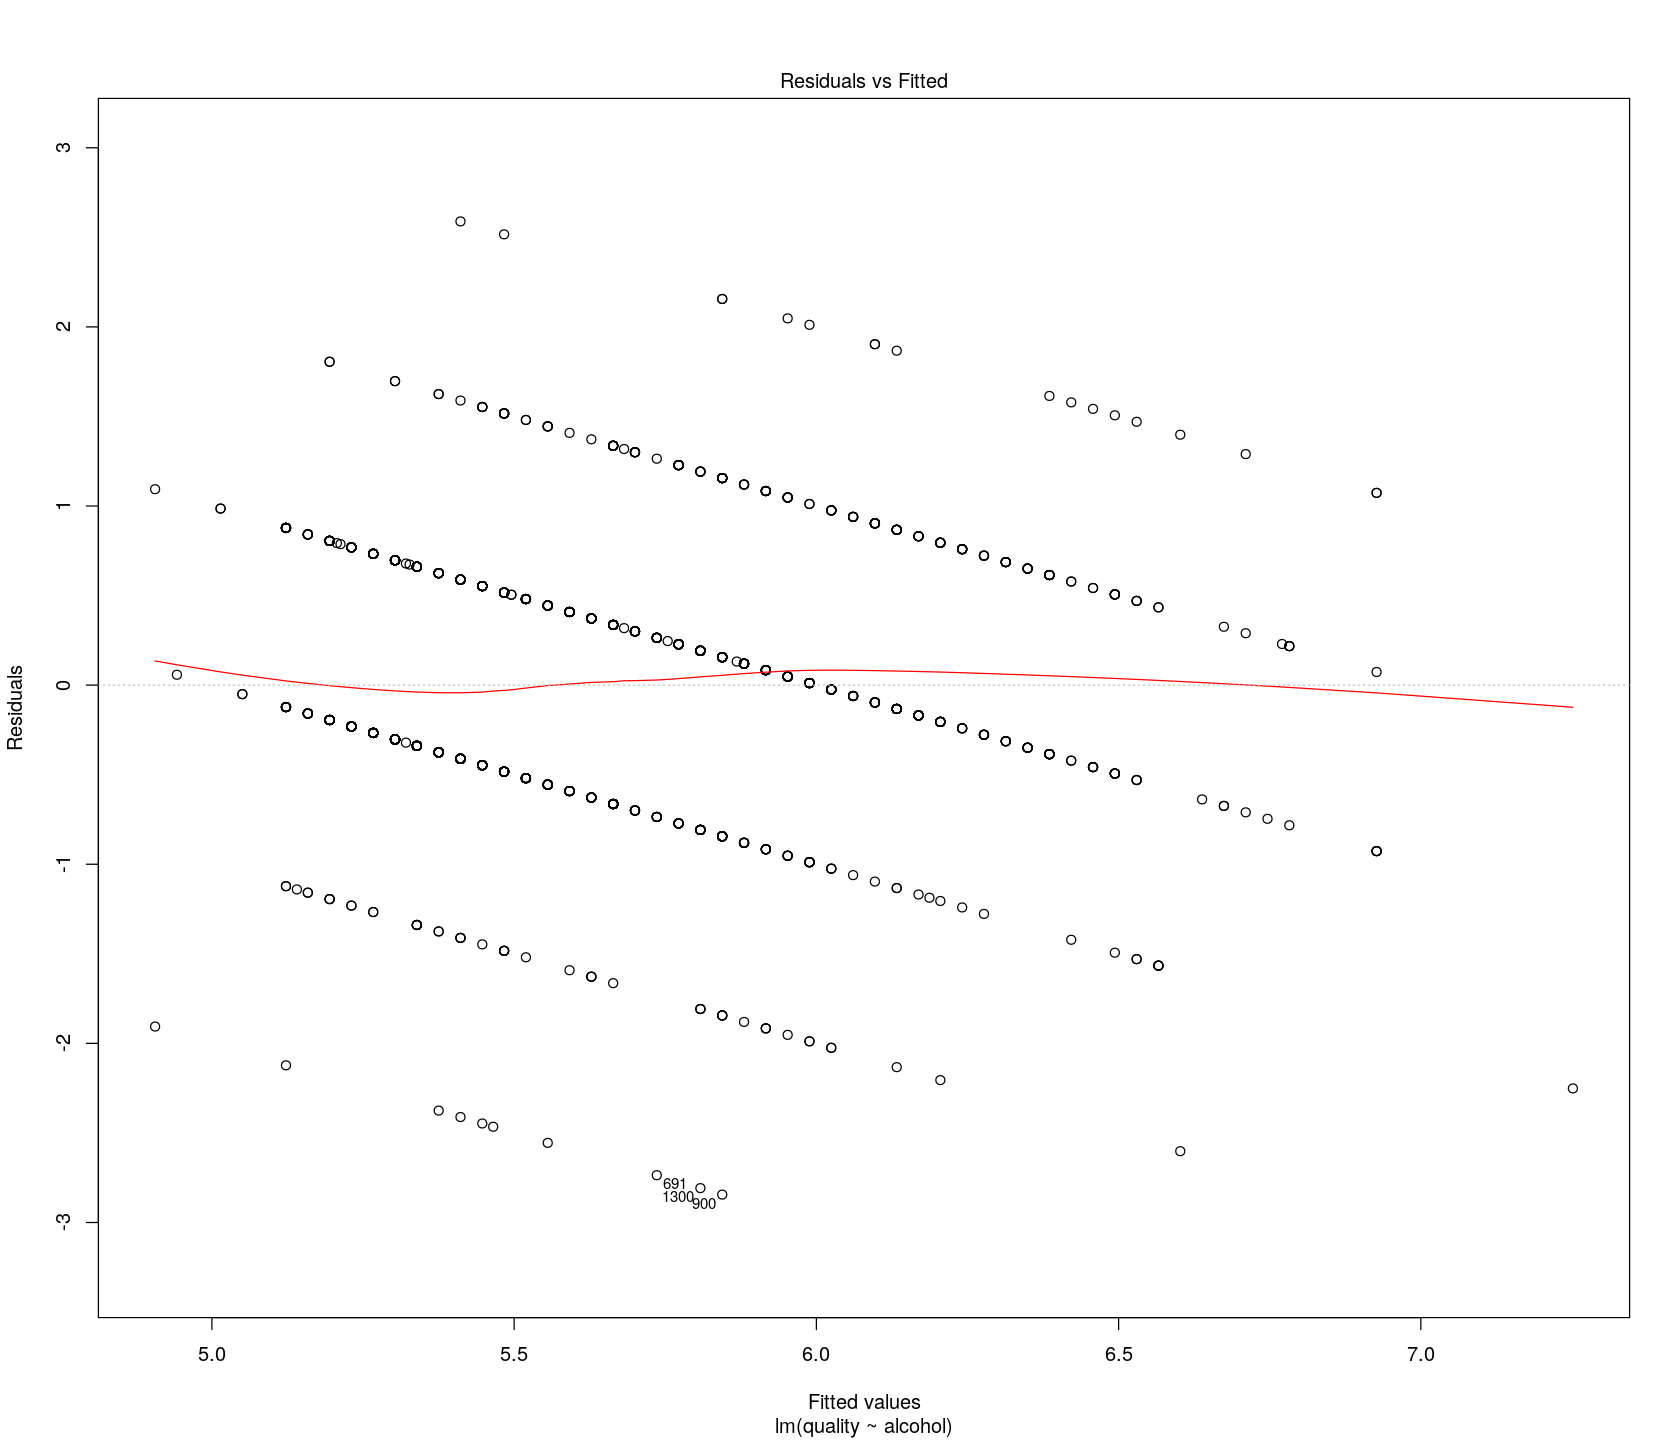

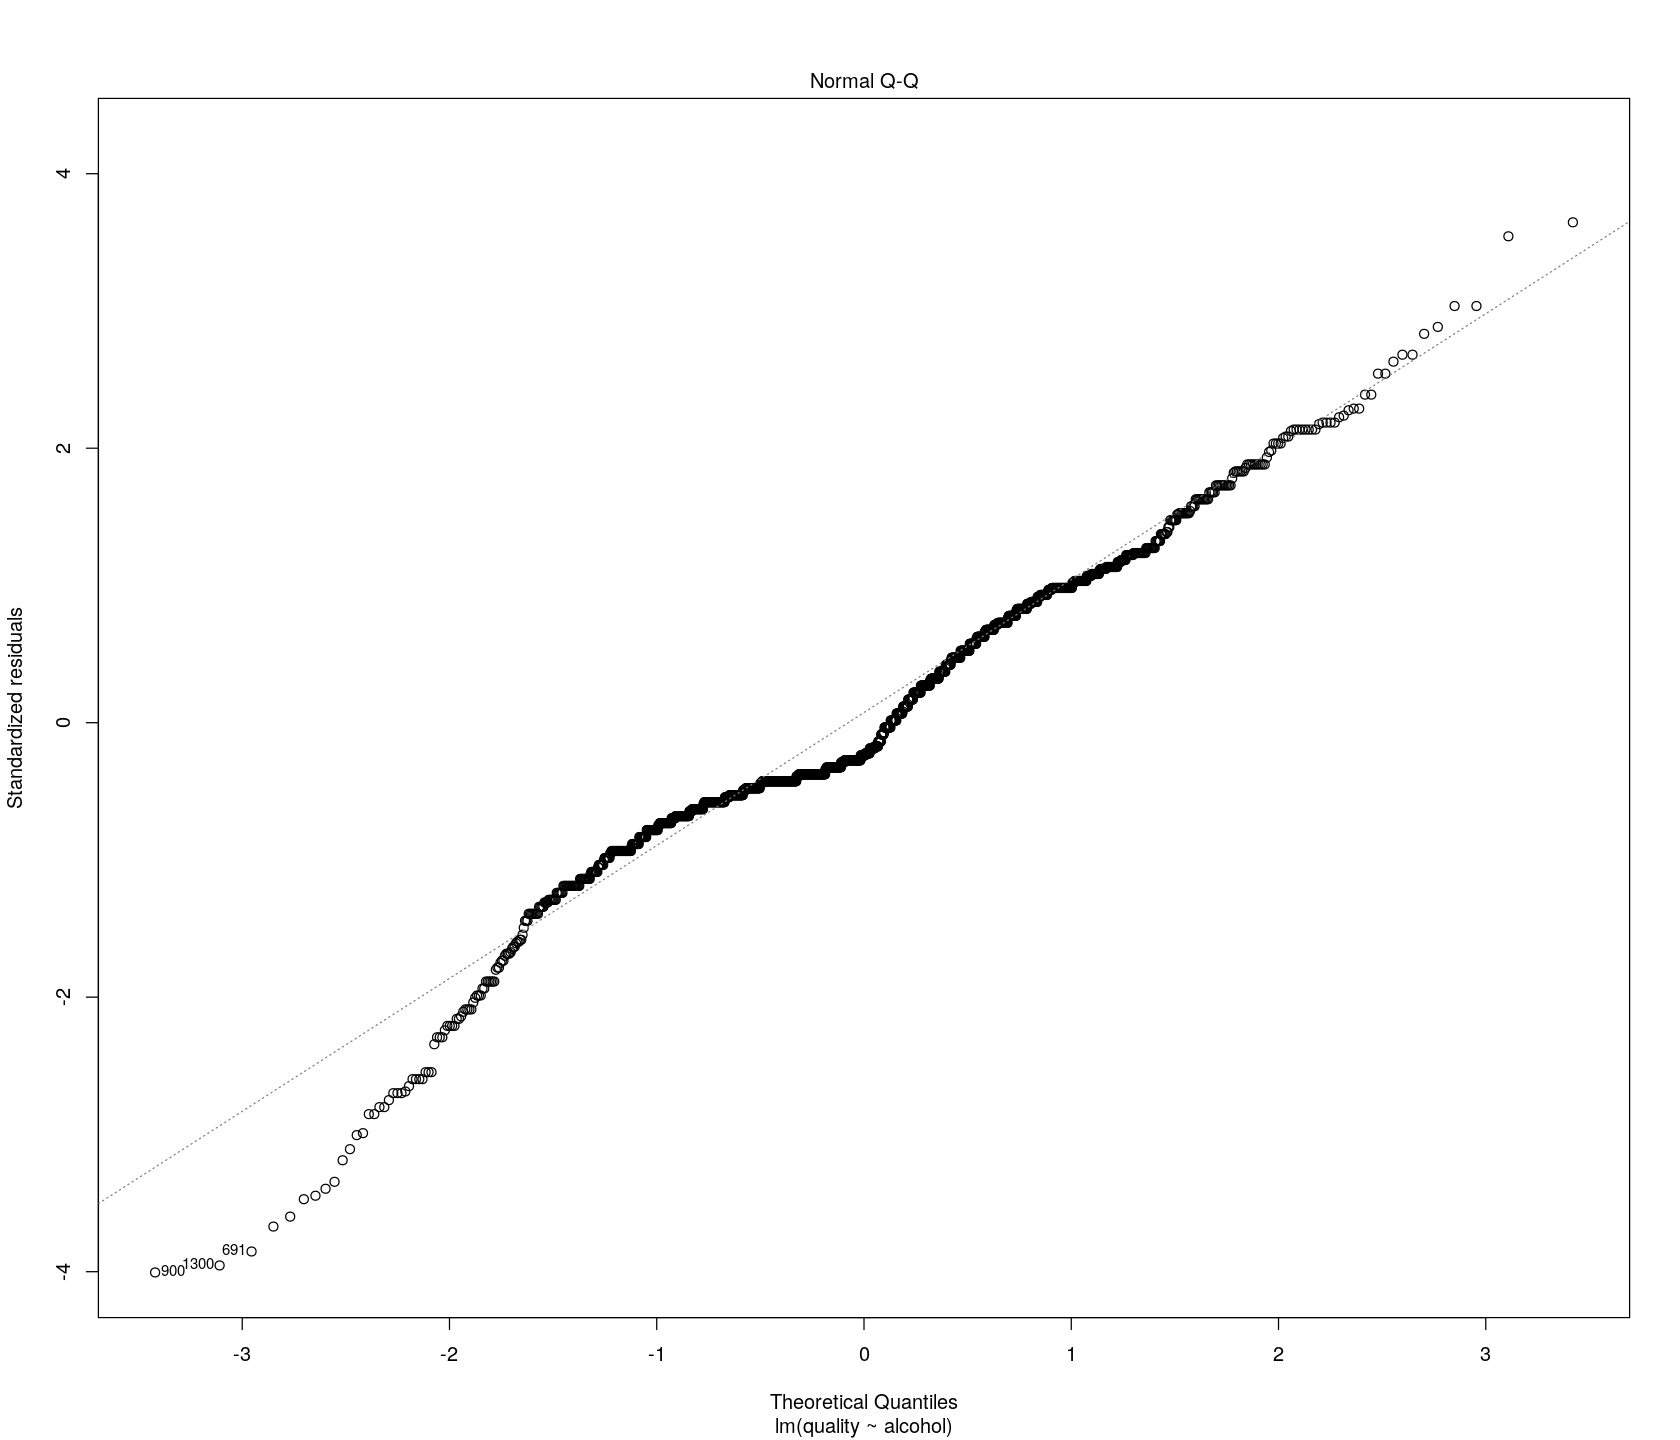

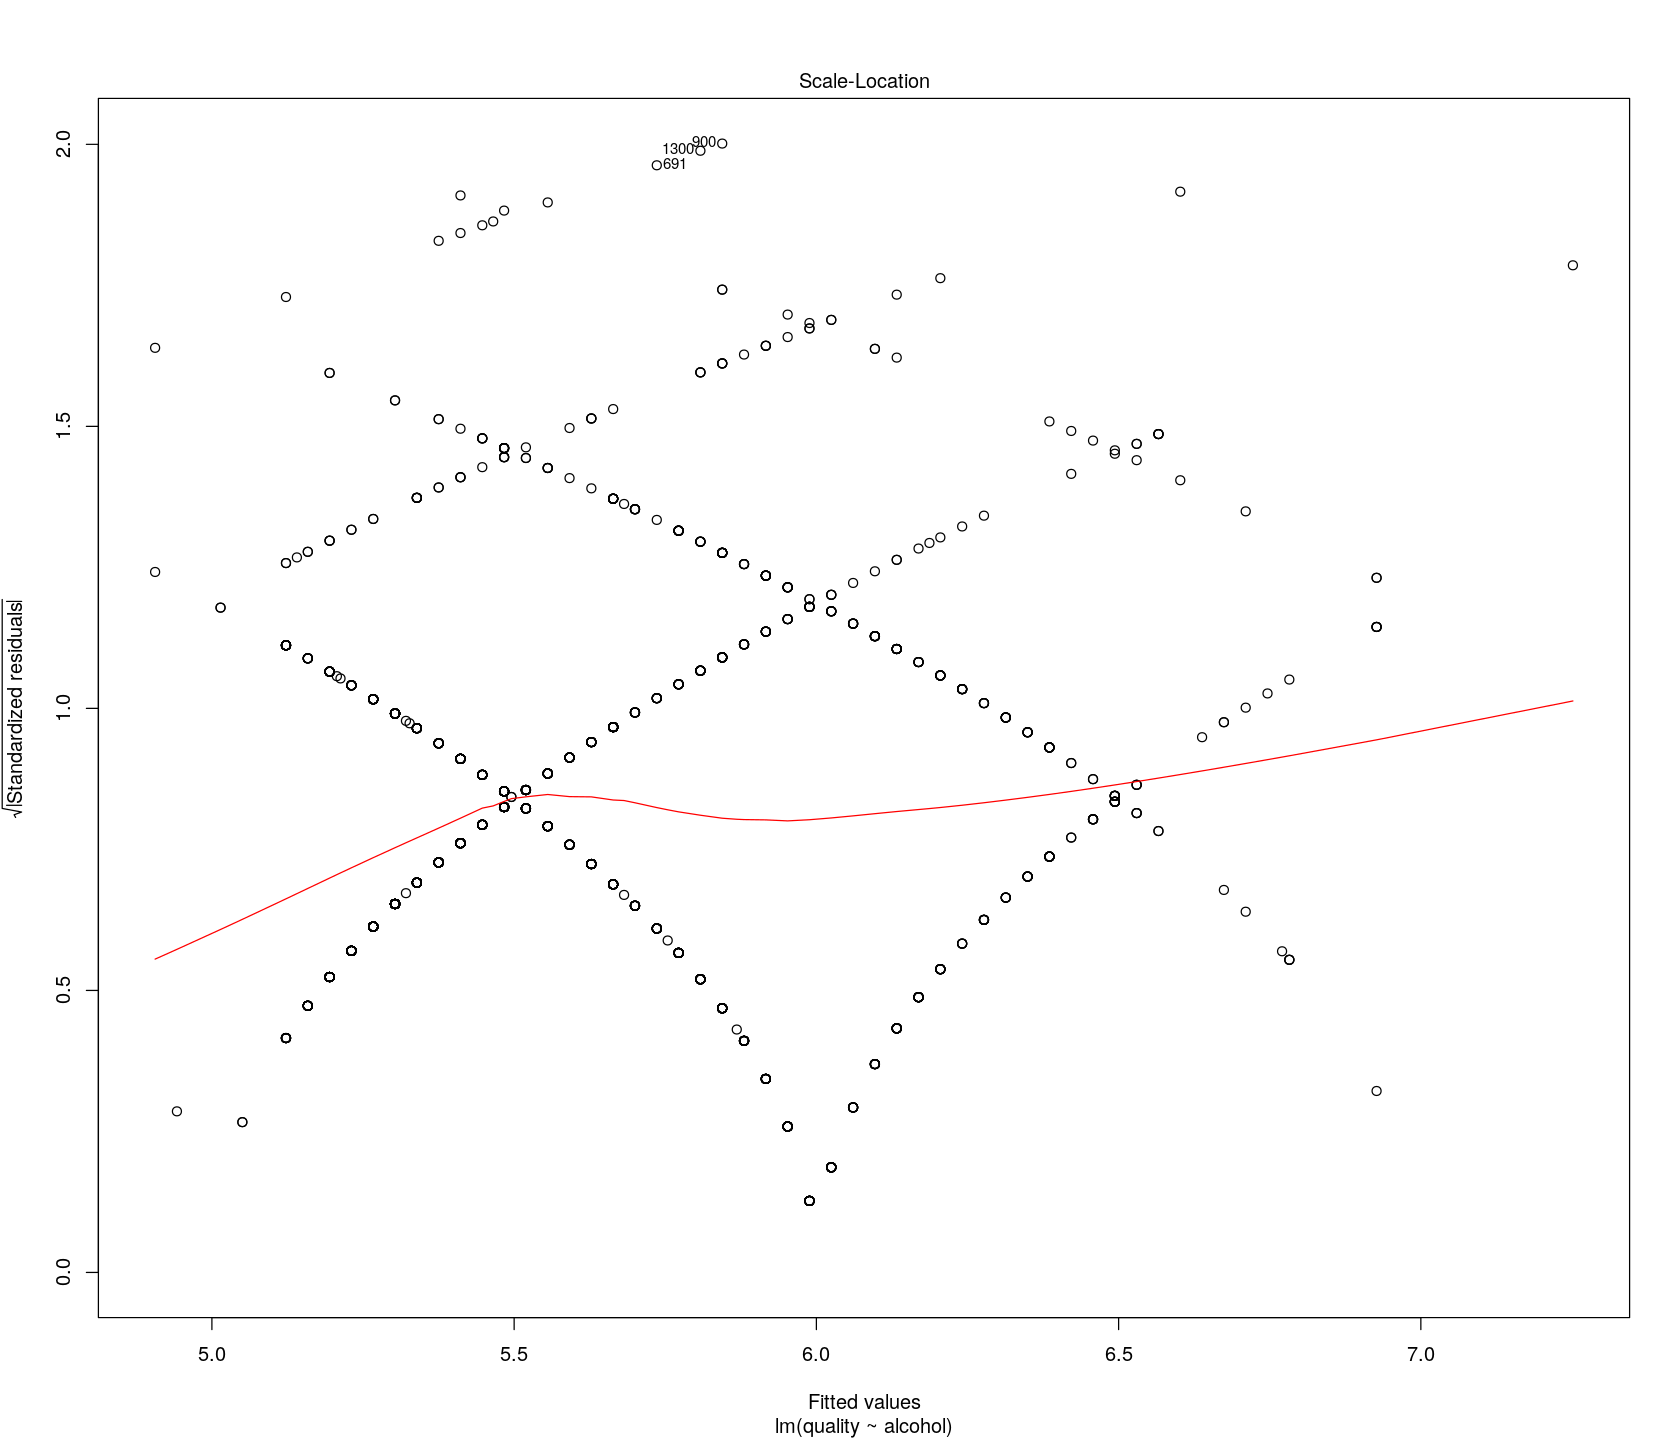

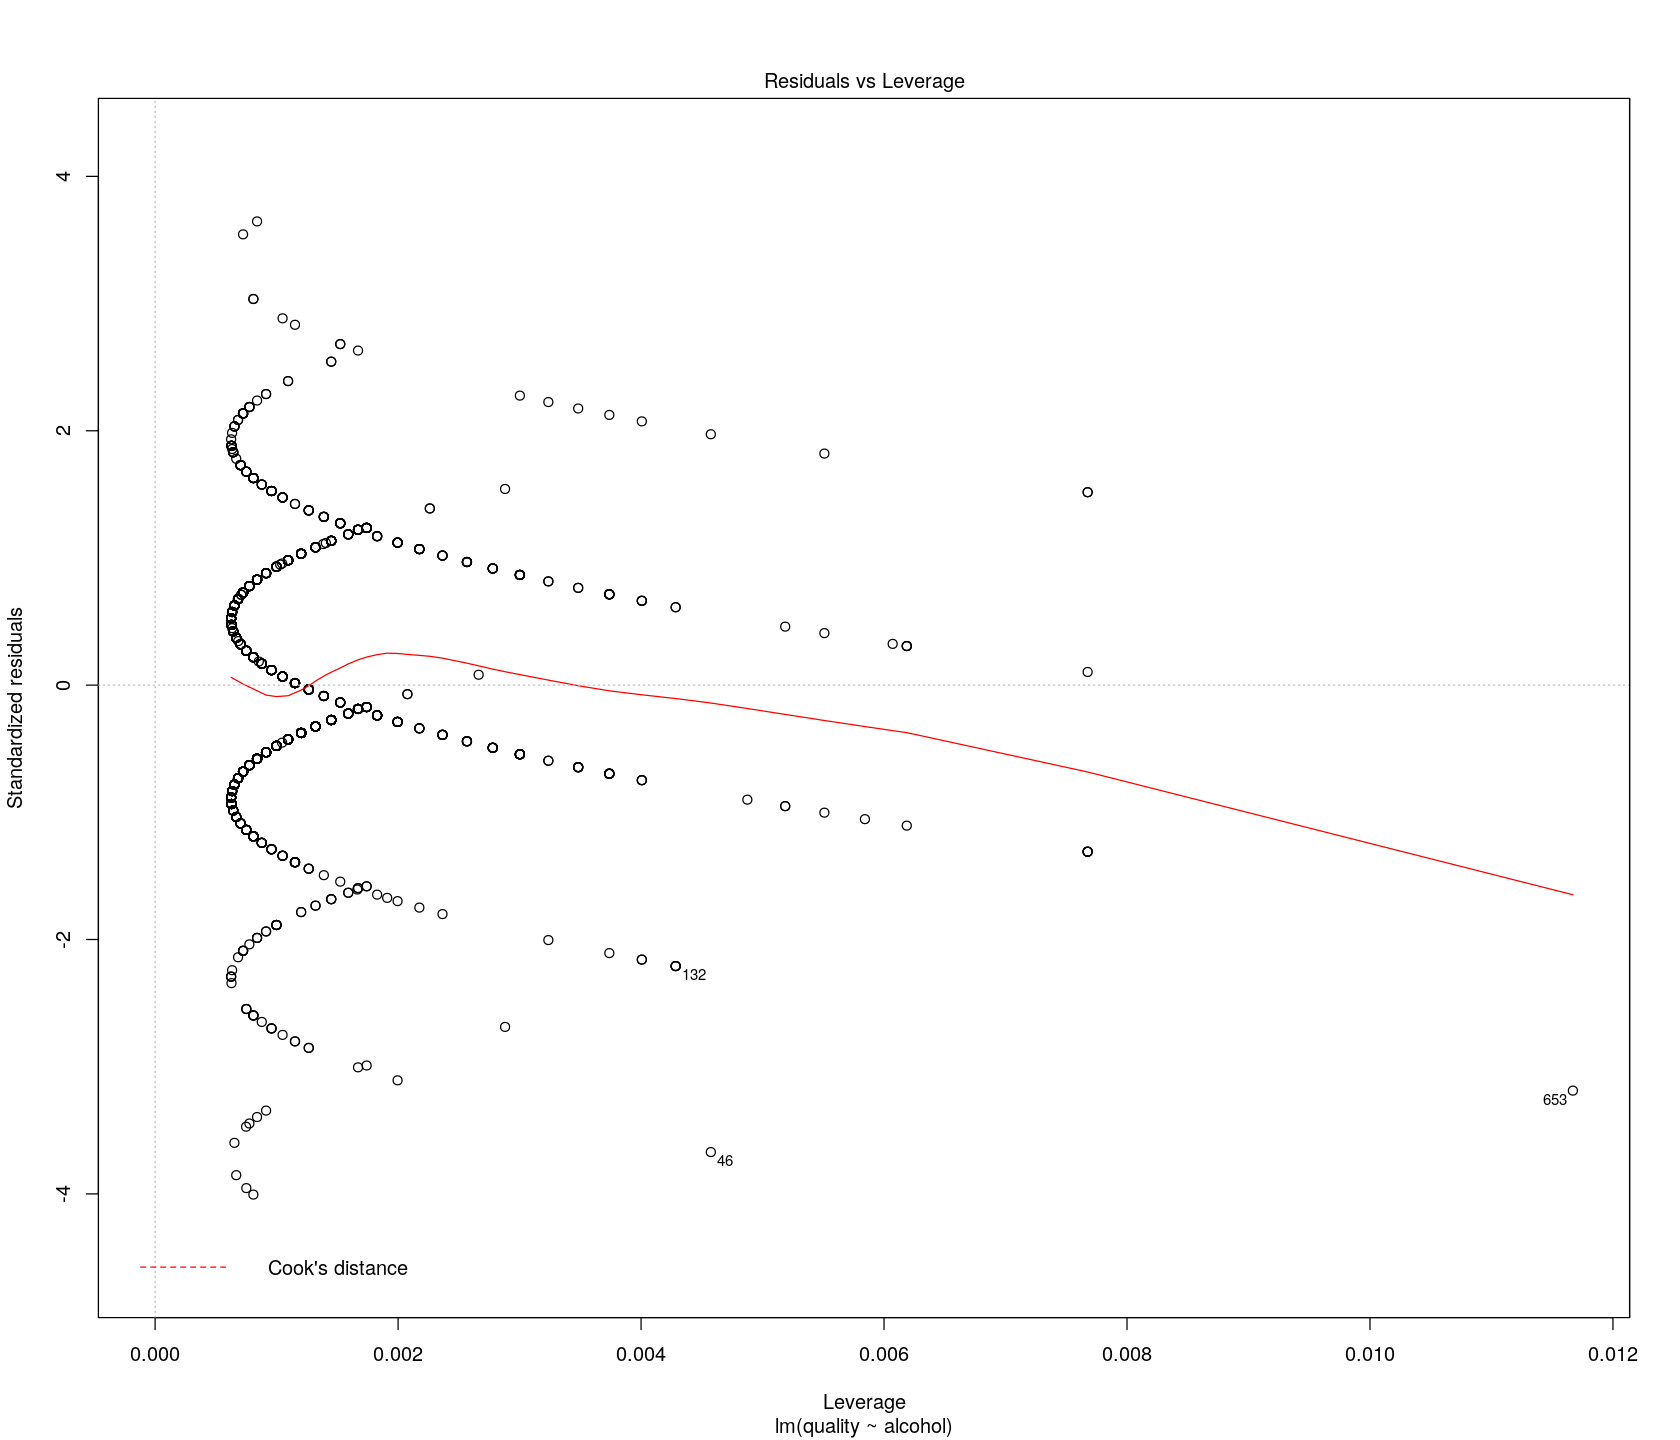

In [10]:
## Gráficas de validación
plot(modelo.lineal)

Una vez inspeccionado el cumplimiento de supuestos podemos generar una tabla que cuantifica el efecto de nuestras variables.

En esta tabla encontraremos:

- Ecuación del modelo estadístico ajustado
- “Box-plot” de los residuales
- Intercepto (prueba $H_0:b=0$)
- Pendiente (prueba $H_0:a=0$)
- Estadísticos de ajustes $R^2$ y $R^2$ ajustado
- Resumen de análisis ANOVA

In [11]:
summary(modelo.lineal)


Call:
lm(formula = quality ~ alcohol, data = wine_raw)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8442 -0.4112 -0.1690  0.5166  2.5888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87497    0.17471   10.73   <2e-16 ***
alcohol      0.36084    0.01668   21.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7104 on 1597 degrees of freedom
Multiple R-squared:  0.2267,	Adjusted R-squared:  0.2263 
F-statistic: 468.3 on 1 and 1597 DF,  p-value: < 2.2e-16


De la tabla podemos observar que:

1. Si existe una relación aproximadamente lineal entre las variables (el p-valor del intercepto es significante)
2. El porcentaje de alcohol si afecta la calidad del vino (el p-valor del de la variable alcohol es significante)

Observe además el estádistico $R^2$ (siempre use el ajustado) el cual nos indica cual es la proporción de variación explicada en el modelo. En este caso el porcentaje de alcohol nos explica el 22% de la variación en la calidad.

## Notas de cierre - Regresión

## Reporte de Resultados

Se tiene como hipótesis que la calidad del vino incrementa con el porcentaje de alcohol.

Para probar la hipótesis se corrió un análisis de regresión de la calidad del vino en función del porcentaje de alcohol luego de hacer una confirmación visual de la linealidad de la relación entre las variables, la normaidad en los datos y la homogeneidad de varianza a lo largo de los rangos de porcentaje de alcohol.

De acuerdo con los resultados de la regresión, la calidad del vino incrementa significativamente con el porcentaje de alcohol ($R^2 ajustado = 0.22$, $P < 2.2e-16$).

En promedio, la calidad del vino incrementa $0.36 \pm 0.01$ puntos ($P < 2e-16$) por cada grado de alcohol.

## Pasos a seguir

Podemos repetir el ejercicio:

1. Usando otra variable como predictora
2. Usando más de una variable como predictora
3. Cambiando la variable respuesta

En todos los casos los procedimientos de validación e interpretación son los mismos.


## Ajuste de un modelo ANOVA

También llamados modelos de análisis de varianza, nos permiten poner a prueba qué tanta influencia tiene una variable predictora (x) que tiene más de dos niveles (factores) sobre una variable de respuesta (y) contínua.

Ejemplos de factores:

- **turno:** mañana, tarde, noche
- **escolaridad:** bachillerato, pregrado, posgrado
- **estrato_socioeconomico:** 1, 2, 3, 4, 5, 6

![Relación de variables](images/R_05.png)

Siguiendo el ejemplo de la producción del vino, se extrajeron 4 muestras de vinos fabricados a partir de sepas de uvas ubicadas en zonas geográficas distintas y se les midió el porcentaje de alcohol.

¿Afecta la sepa de la uva el porcentaje de alcohol?

## Cargar Librerías

In [12]:
library("readxl")

## Cargar datos, ajustar su estructura y calcular descriptivos

In [13]:
## Cargo datos
raw_data <- read_xlsx("project_multi_cuanti/data/sepas.xlsx", sheet='data')

## Convierto variables respectivas a factores
factores <- c("sepa")
raw_data %>% mutate_at(factores,factor) -> data

## Revisar la estructura de los datos
str(data)

tibble [60 × 2] (S3: tbl_df/tbl/data.frame)
 $ sepa   : Factor w/ 4 levels "CENTRO","NORTE",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ alcohol: num [1:60] 3.21 4.78 10.24 6.56 6.81 ...


In [14]:
## Hagamos primero unos estadísticos descriptivos
descriptive_stats <- group_by(data, sepa) %>%
  summarise(
    count = n(),
    mean = mean(alcohol, na.rm = TRUE),
    sd = sd(alcohol, na.rm = TRUE)
  )
descriptive_stats

`summarise()` ungrouping output (override with `.groups` argument)



sepa,count,mean,sd
<fct>,<int>,<dbl>,<dbl>
CENTRO,15,14.355041,2.623993
NORTE,15,6.309211,1.925173
ORIENTAL,15,12.718305,3.277787
SUR,15,4.386088,1.540191


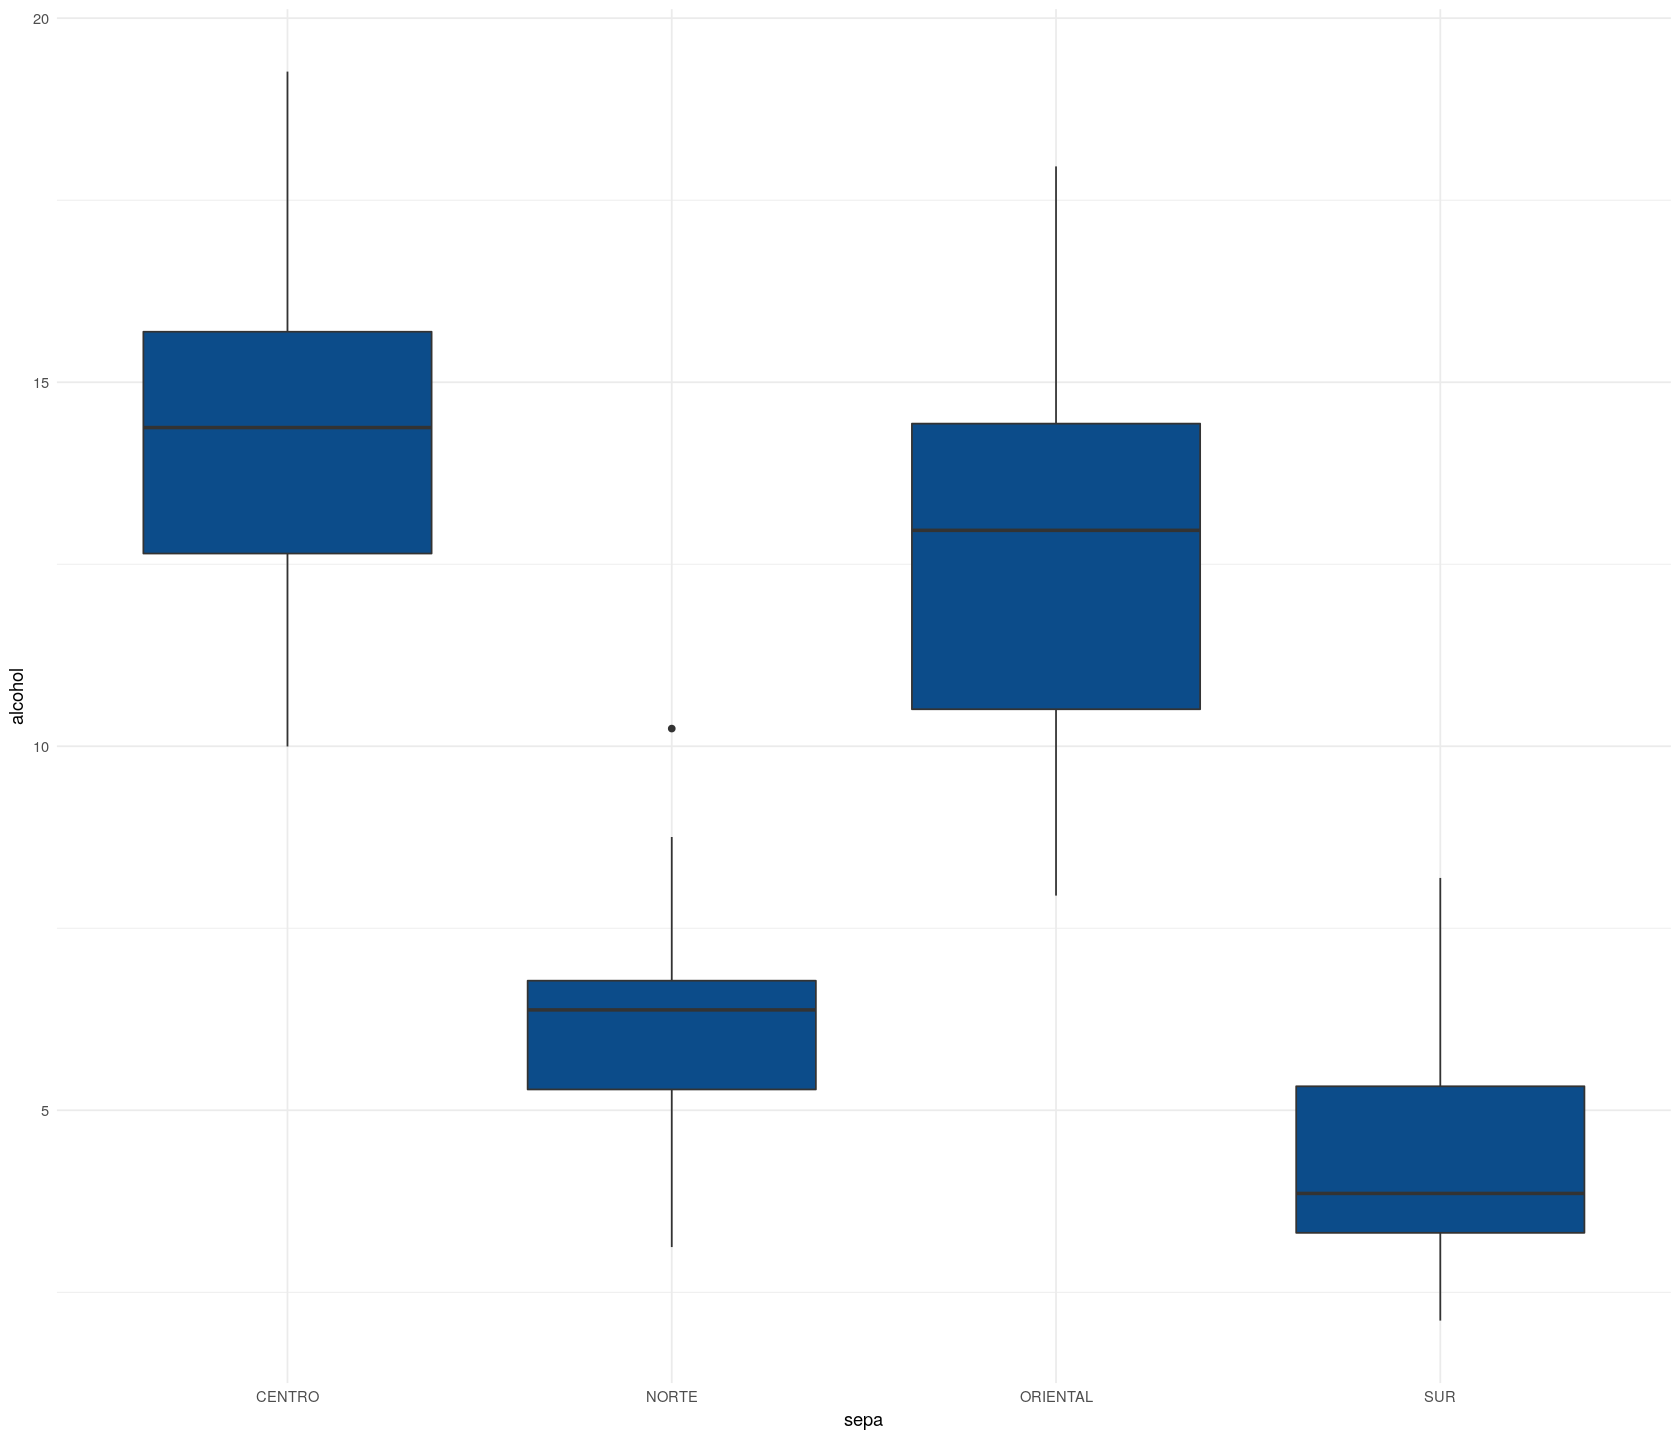

In [15]:
## Boxplot por grupos/factores
ggplot(data = data) +
  aes(x = sepa, y = alcohol) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

En R los modelos ANOVA se ajustan por medio del método aov(). Vamos a hacer el ajuste del modelo y a guardar los resultados en una variable llamado modelo.anova

In [16]:
## ANOVA
modelo.anova <- aov(alcohol ~ sepa, data = data)
summary(modelo.anova)

            Df Sum Sq Mean Sq F value Pr(>F)    
sepa         3 1053.7   351.2   59.26 <2e-16 ***
Residuals   56  331.9     5.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Podemos observar que el **p-valor** para la variable sepa es significante, es decir, tenemos evidencia estadística para concluir que los cambios vistos en el porcentaje del alcohol no se deben al azar y son producto de la sepa.

Al igual que en los modelos de regresión, los modelos ANOVa también cuentan con unos supuestos que deben ser verificados.

- Varianza homogénea entre grupos. Lo verificaremos con una prueba estadística **Test de Levene** cuya hipótesis nula es que la varianza es la misma a lo largo de todos los factores.
- Los residuales se distribuyen normalmente. Lo verificaremos con una prueba estadística llamada **Test de Shapiro** cuya hipótesis nula es que el conjunto de datos sigue una distribución aproximadamente normal.

En ambas pruebas para comprobar los supuestos nuestro interés es no rechazar la hipótesis.

In [17]:
## Instalamos la librería car que contiene el método para probar el supuesto #1
#installed.packages("car")

## La cargamos
library("car")

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [18]:
## Comprobación de supuestos

## Varianza homogénea entre grupos
leveneTest(alcohol ~ sepa, data = data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,2.593386,0.0615699
,56,NA,NA


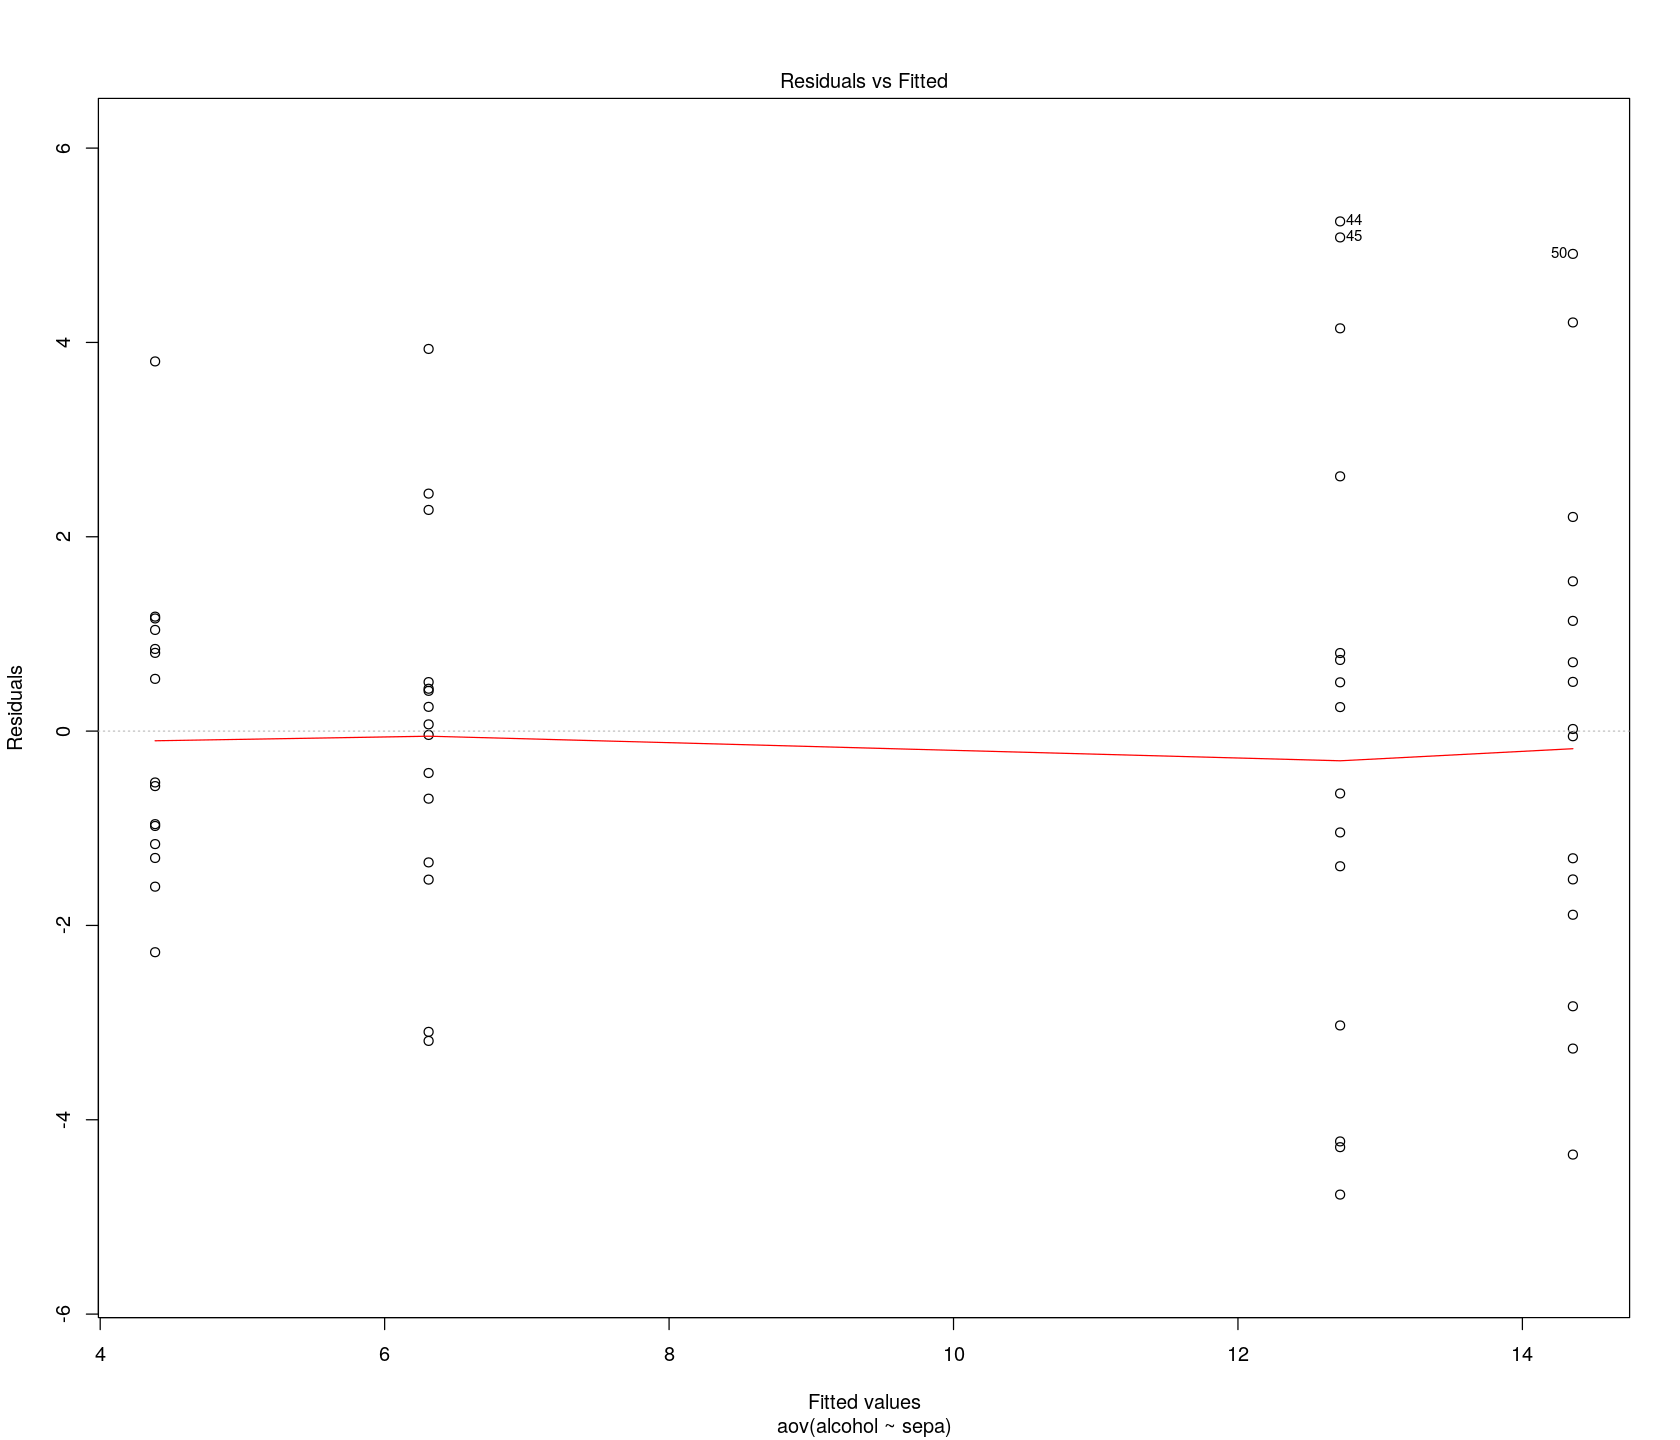

In [19]:
modelo.anova_residuals <- residuals(object = modelo.anova)
plot(modelo.anova, 1) # Plot de residuales

In [20]:
## Residuales distribuidos normalmente
shapiro.test(x = modelo.anova_residuals)


	Shapiro-Wilk normality test

data:  modelo.anova_residuals
W = 0.97153, p-value = 0.1733


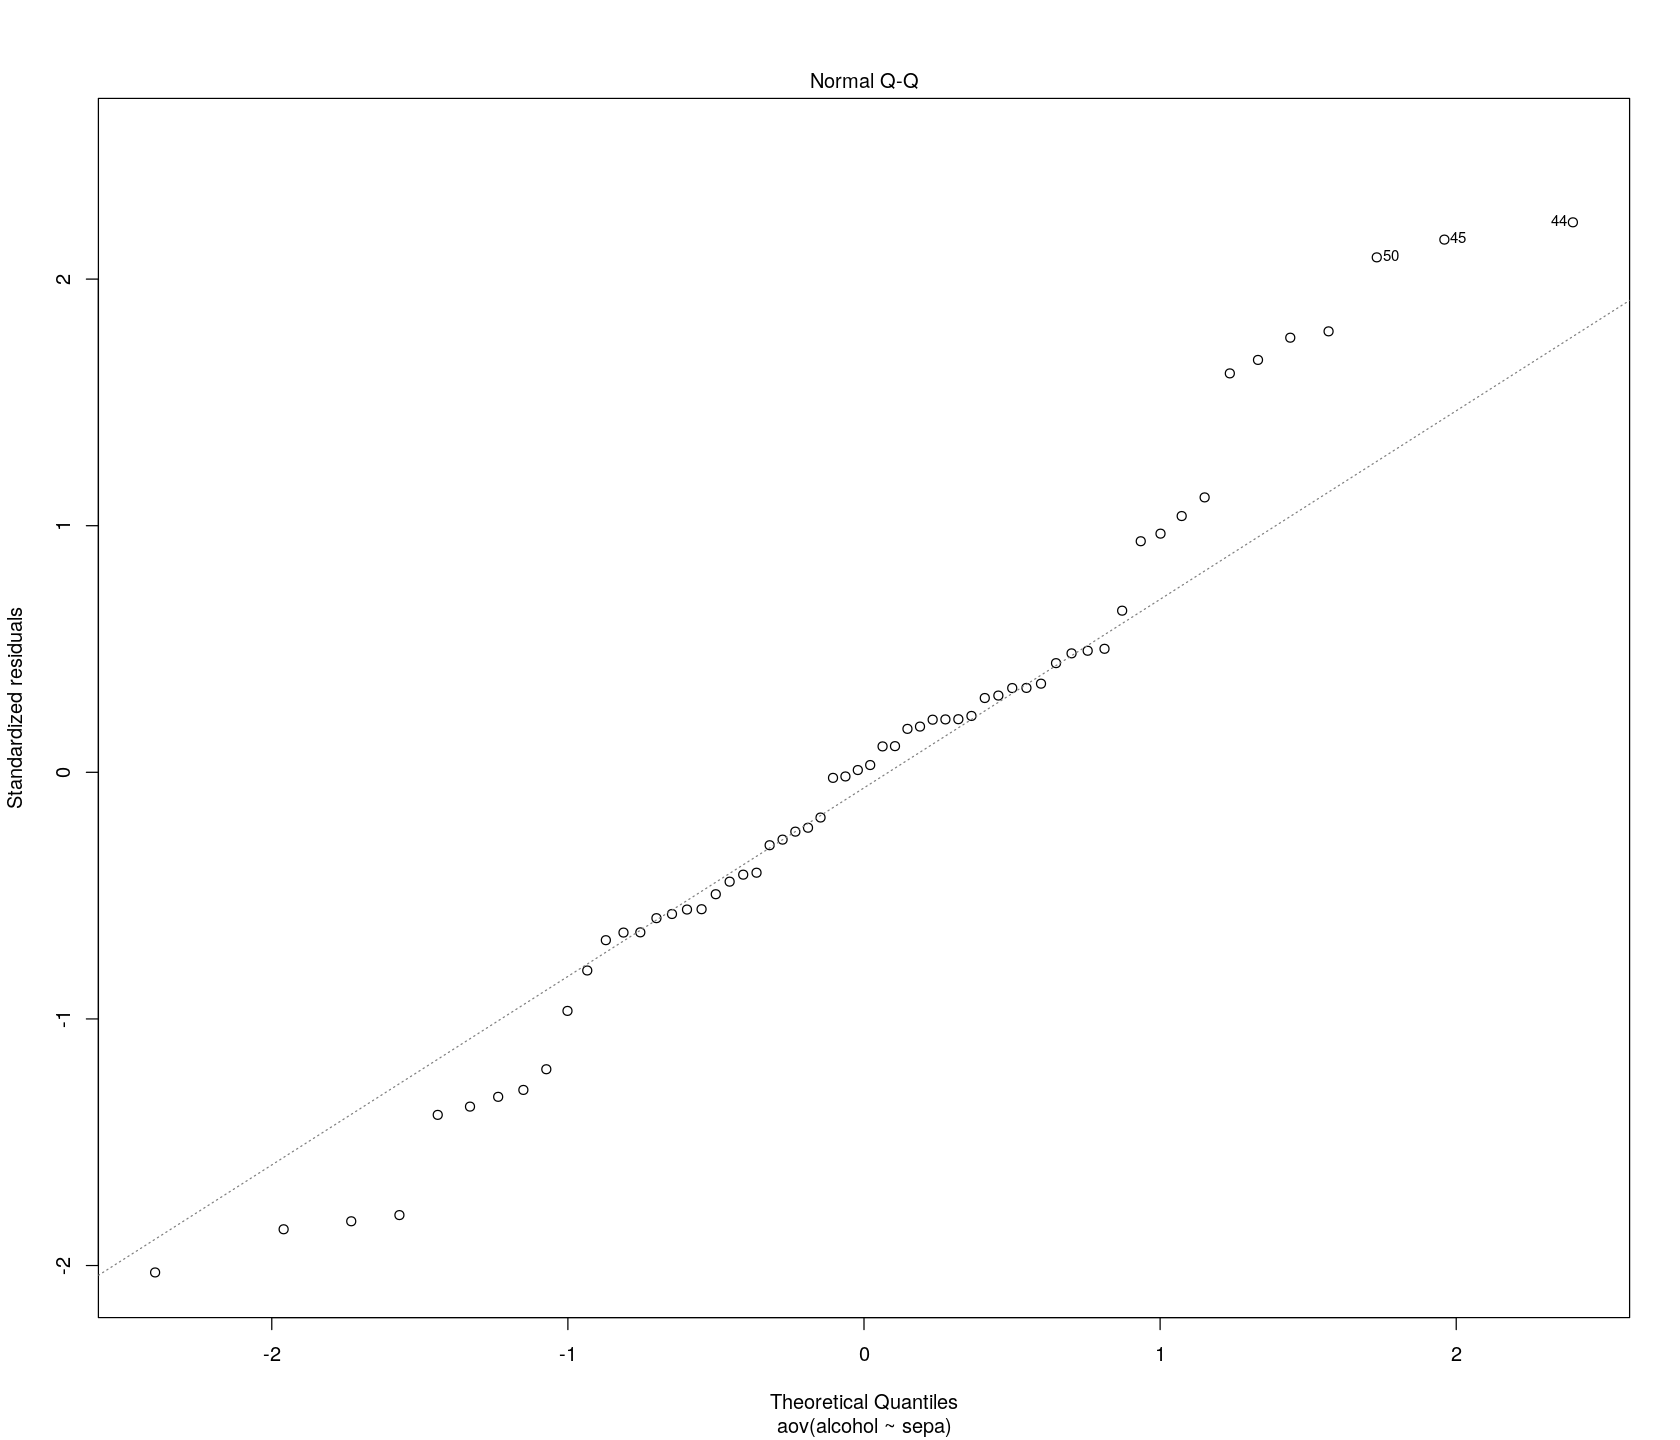

In [21]:
plot(modelo.anova, 2) # Plot Q-Q

Dado que en ambas pruebas no rechazamos la hipótesis nula podemos concluir que nuestros modelo ANOVA es apto para analizar la relación entre las variables de interés, y específicamente en este caso, que la sepa sí afecta el porcentaje de alcohol del vino.

## Análisis Post-HOC para el ANOVA

Hasta ahora concluimos, a partir de evidencia estadística, que la sepa sí afecta el porcentaje de alcohol. Sin embargo, ¿cómo podríamos profundizar en explicar esos efectos?

Para esto haremos lo que en estadística se llaman análisis post-hoc los cuales nos permiten examinar con mayor detalle las diferencias ya comprobadas. Dicho de otra manera, haremos análisis post hoc sí y solo sí el modelo ANOVA es significante y nos interesa conocer cómo diferentes los grupos/factores.

Aunque existen varios análisis post hoc, llevaremos a cabo el llamado **Tukey HSD** el cual es ampliamente usado y aceptado.

En R este análisis lo haremos mediante el método **TukeyHSD()** que nos permitirá comparar todos los grupos de a parejas con la hipótesis nula de que sus valores promedios son los mismos.

In [22]:
## Análisis Post hoc
TukeyHSD(modelo.anova)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = alcohol ~ sepa, data = data)

$sepa
                     diff        lwr        upr     p adj
NORTE-CENTRO    -8.045831 -10.399707 -5.6919544 0.0000000
ORIENTAL-CENTRO -1.636736  -3.990612  0.7171403 0.2652868
SUR-CENTRO      -9.968953 -12.322830 -7.6150770 0.0000000
ORIENTAL-NORTE   6.409095   4.055218  8.7629710 0.0000000
SUR-NORTE       -1.923123  -4.276999  0.4307536 0.1462197
SUR-ORIENTAL    -8.332217 -10.686094 -5.9783410 0.0000000


### Notas para los modelos ANOVA

#### Número de efectos

En este caso comprobamos y detallamos el efecto de 1 factor llamado **sepa** sobre una variable contínua llamada **alcohol**. Estos modelos también son llamados ANOVA de una vía.

Si tuvíesemos otro factor de interés podríamos construir un modelo con dos factores y una variable respuesta. Estos modelos son llamados ANOVA de dos vías.

#### Si fallan los supuestos

Si la comprobación de supuestos falla al nivel de confianza deseado entonces se deben seguir otros procedimientos para comprobar si existen efectos entre las variables de interés. Estos procedimientos hacen parte del campo de la estadística no paramétrica.


Vamos a suponer que al hacer la comprobación de supuestos estos fueron rechazados. Para sortear estas restricciones, manteniendo el mismo problema de interés, podemos hacer de una prueba no paramétrica llamada **Test de Kruskall Wallis** la cual podemos llamar con el método **kruskal.test()**.

In [23]:
## Kruskall Wallis
kruskal.test(alcohol ~ sepa, data = data)


	Kruskal-Wallis rank sum test

data:  alcohol by sepa
Kruskal-Wallis chi-squared = 44.846, df = 3, p-value = 9.978e-10


Esta prueba tiene como hipótesis que no existen diferencias en la variable de respuesta al cambiar los grupos/factores, es decir, que no hay efectos.

En este caso $p−=9.978e−10$ por lo que podemos rechazar la hipótesis y concluir que sí existe un efecto de la sepa sobre el porcentaje de alcohol del vino.

**Nota:** Usando tanto un modelo ANOVA (paramétrico) como un test de Kruskall Wallis (no paramétrico) estamos concluyendo lo mismo.

Al igual que en el caso paramétrico, si comprobamos que existen efectos y si nos interesa ver las diferencias entre los grupos/factores, tendríamos que conducir un análisis post hoc.

- Existen análisis post hoc para modelos ANOVA
- Existen análisis post hoc para pruebas de Kruskall Wallis

![Métodos entre diferentes tipos de variables](project_multi_cuanti/images/R_06.png)

R contiene librerías que permiten realizar diferentes operaciones sobre un conjunto de dato, la siguiente imagen simplifica algunas de estas:

![Tratamiento de datos en R](project_multi_cuanti/images/R_07.png)
